In [1]:
!pip install hdbscan --upgrade

Requirement already up-to-date: hdbscan in /Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages (0.8.13)
Requirement not upgraded as not directly required: numpy in /Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages (from hdbscan) (1.14.3)
Requirement not upgraded as not directly required: scikit-learn>=0.16 in /Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages (from hdbscan) (0.19.1)


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Let's run DBSCAN on two different sets of randomly generated data and see how it performs.

### Dataset 1: Multivariate Normal data.

In [3]:
np.random.seed(2552277) # ALLCAPS on a phone

In [4]:
x1 = np.random.normal(25, 10, 100) #Mean Std size

x2 = np.random.normal(500, 250, 100)

In [5]:
df = pd.DataFrame()

df = df.from_dict({'x1': x1,
                   'x2': x2})

In [6]:
print(x1[0:5])
print(x2[0:5])

[29.8731048  -4.83172141 15.74865778 33.99456318 17.93524935]
[279.51051448 598.46760092 933.09622016 456.91592861  76.08095639]


In [7]:
df.head()

,x1,x2
0,29.873105,279.510514
1,-4.831721,598.467601
2,15.748658,933.096220
3,33.994563,456.915929
4,17.935249,76.080956


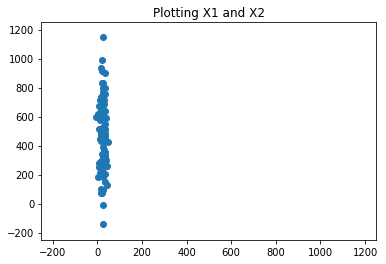

In [8]:
plt.title('Plotting X1 and X2')
plt.xlim(-250,1250)
plt.ylim(-250,1250)
plt.scatter(df['x1'],df['x2']);

we need to scale as the data is too close . X1 can't be clusters as it is on a stright line band '

In [9]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['x1', 'x2'])

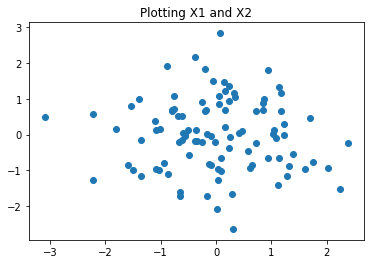

In [10]:
plt.title('Plotting X1 and X2')
plt.scatter(df['x1'],df['x2']);

#### Let's fit DBSCAN on our data with `eps = 0.5` and `min_samples = 5`. (Note: This is the default in `sklearn`!)

In [11]:
cluster =DBSCAN(eps =0.5,  # epsilon
               min_samples=5) # minimum number of observation to make 

#### Go ahead and fit DBSCAN on our data with `eps = 1` and `min_samples = 5`.

In [12]:
cluster.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [13]:
labels=cluster.labels_

In [14]:
print(labels) # -1 indicates no cluster aka outlier was unassigned

[ 0 -1 -1  0  2  0  0  0  0  0  0  0  0 -1  0  0  0  0  2  0 -1  0  0  0
  0  0  0  0  1  0  0  0  0  1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0
  0  0 -1  2 -1  0  0  0  0  1  0  1  0  0  0 -1  2  0  0  0  0  0 -1  0
  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  0  0 -1
  0  0  1 -1]


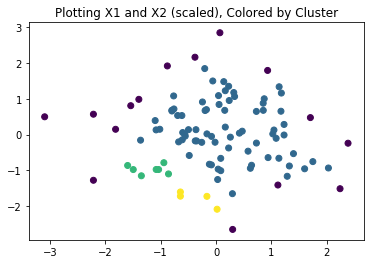

In [15]:
plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [16]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coefficient: 0.145687


#### Let's try DBSCAN on our data with `eps = 1` and `min_samples = 20`.

[-1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1  1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


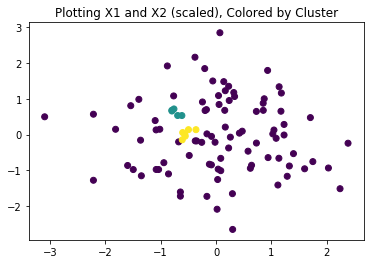

In [17]:
cluster = DBSCAN(eps = 0.2,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_)

In [18]:
from sklearn.datasets import load_iris

In [19]:
data = load_iris()

In [20]:
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['target'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


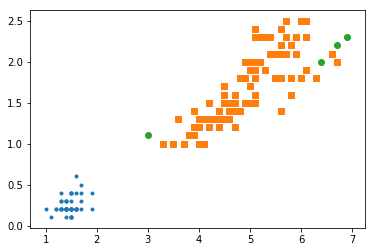

In [21]:
cluster = DBSCAN(eps = .75,
                 min_samples = 8)
cluster.fit(iris.drop('target', axis=1))
iris['cluster'] = cluster.labels_

markers = ['.',',','o','v','^','<','>']
for i, cluster in enumerate(iris['cluster'].unique()):
    temp = iris[iris['cluster'] == cluster]
    plt.scatter(temp['petal length (cm)'], temp['petal width (cm)'],
               marker=markers[i])
plt.show()

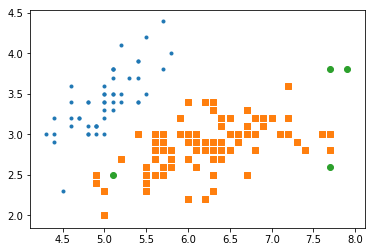

In [22]:
cluster = DBSCAN(eps = .75,
                 min_samples = 8)
cluster.fit(iris.drop('target', axis=1))
iris['cluster'] = cluster.labels_

markers = ['.',',','o','v','^','<','>']
for i, cluster in enumerate(iris['cluster'].unique()):
    temp = iris[iris['cluster'] == cluster]
    plt.scatter(temp['sepal length (cm)'], temp['sepal width (cm)'],
               marker=markers[i])
plt.show()

In [23]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coefficient: -0.177274


### Dataset 2: Smiley/Frowny

In [24]:
x1_1 = np.random.uniform(0, 50, 100)

x1_2 = np.random.uniform(60, 110, 100)

x2_1 = (x1_1 - 25)  ** 2 + np.random.normal(0, 10, 1)

x2_2 = -1 * (x1_2 - 85) ** 2 + np.random.normal(0, 10, 1)

In [25]:
x1 = np.append(x1_1, x1_2)
    
x2 = np.append(x2_1, x2_2)

In [26]:
df = pd.DataFrame()

df = df.from_dict({'x1': x1,
                   'x2': x2})

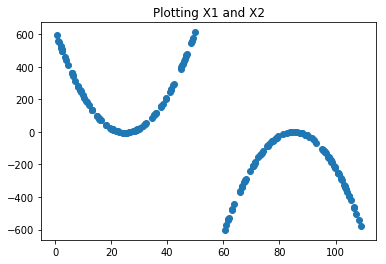

In [27]:
plt.title('Plotting X1 and X2')
plt.scatter(df['x1'],df['x2']);

In [28]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['x1', 'x2'])

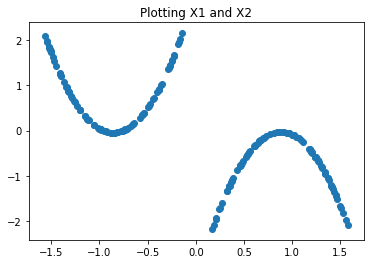

In [29]:
plt.title('Plotting X1 and X2')
plt.scatter(df['x1'],df['x2']);

#### Let's try DBSCAN on our data with `eps = 0.2` and `min_samples = 5`.

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 -1  0
  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  1  1  2  2  2  2  2  2  2  2  2 -1  2  2  3  2  2  2  3  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2
  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  2  2  2  2  2
  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  3  2
  2  2  2  3  3  2  2  2]


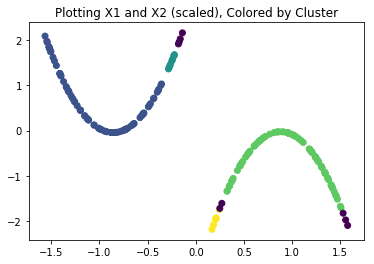

In [30]:
cluster = DBSCAN(eps = 0.2,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_)

#### By only tweaking `epsilon`, can you get the above to return exactly two clusters? (The two clusters we would expect?)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


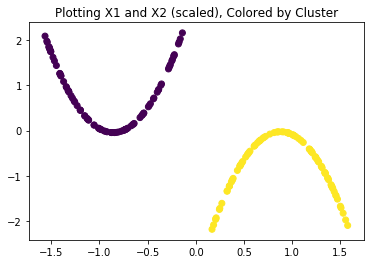

In [31]:
cluster = DBSCAN(eps = 1,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [32]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coefficient: 0.617735


#### By only tweaking `min_samples`, can you get the above to return exactly two clusters? (The two clusters we would expect?) Be sure to reset `eps` to `0.2`.

In [33]:
for i in range(0,200): # picked 200 as there are 200 data points 
    cluster=DBSCAN(eps=0.2,min_samples=i) # instantiate 
    cluster.fit(df)
    labels=cluster.labels_
    if len(set(cluster.labels_))==2 and -1 not in set(cluster.labels_):#-1 is the outlier so if there is not outlier use 
        print("Yes! Use min_samples = " + str(i))
        break
    else:
        print("No, not min_samples = " + str(i))

No, not min_samples = 0
No, not min_samples = 1
No, not min_samples = 2
No, not min_samples = 3
No, not min_samples = 4
No, not min_samples = 5
No, not min_samples = 6
No, not min_samples = 7
No, not min_samples = 8
No, not min_samples = 9
No, not min_samples = 10
No, not min_samples = 11
No, not min_samples = 12
No, not min_samples = 13
No, not min_samples = 14
No, not min_samples = 15
No, not min_samples = 16
No, not min_samples = 17
No, not min_samples = 18
No, not min_samples = 19
No, not min_samples = 20
No, not min_samples = 21
No, not min_samples = 22
No, not min_samples = 23
No, not min_samples = 24
No, not min_samples = 25
No, not min_samples = 26
No, not min_samples = 27
No, not min_samples = 28
No, not min_samples = 29
No, not min_samples = 30
No, not min_samples = 31
No, not min_samples = 32
No, not min_samples = 33
No, not min_samples = 34
No, not min_samples = 35
No, not min_samples = 36
No, not min_samples = 37
No, not min_samples = 38
No, not min_samples = 39
No, not mi

In [34]:
for i in range(0,600): # picked 200 as there are 200 data points 
    cluster=DBSCAN(eps=0.2,min_samples=i) # instantiate 
    cluster.fit(df)
    labels=cluster.labels_
    if len(set(cluster.labels_))==2 and -1 not in set(cluster.labels_):#-1 is the outlier so if there is not outlier use 
        print("Yes! Use min_samples = " + str(i))
        break
    else:
        print("No, not min_samples = " + str(i))

No, not min_samples = 0
No, not min_samples = 1
No, not min_samples = 2
No, not min_samples = 3
No, not min_samples = 4
No, not min_samples = 5
No, not min_samples = 6
No, not min_samples = 7
No, not min_samples = 8
No, not min_samples = 9
No, not min_samples = 10
No, not min_samples = 11
No, not min_samples = 12
No, not min_samples = 13
No, not min_samples = 14
No, not min_samples = 15
No, not min_samples = 16
No, not min_samples = 17
No, not min_samples = 18
No, not min_samples = 19
No, not min_samples = 20
No, not min_samples = 21
No, not min_samples = 22
No, not min_samples = 23
No, not min_samples = 24
No, not min_samples = 25
No, not min_samples = 26
No, not min_samples = 27
No, not min_samples = 28
No, not min_samples = 29
No, not min_samples = 30
No, not min_samples = 31
No, not min_samples = 32
No, not min_samples = 33
No, not min_samples = 34
No, not min_samples = 35
No, not min_samples = 36
No, not min_samples = 37
No, not min_samples = 38
No, not min_samples = 39
No, not mi

No, not min_samples = 336
No, not min_samples = 337
No, not min_samples = 338
No, not min_samples = 339
No, not min_samples = 340
No, not min_samples = 341
No, not min_samples = 342
No, not min_samples = 343
No, not min_samples = 344
No, not min_samples = 345
No, not min_samples = 346
No, not min_samples = 347
No, not min_samples = 348
No, not min_samples = 349
No, not min_samples = 350
No, not min_samples = 351
No, not min_samples = 352
No, not min_samples = 353
No, not min_samples = 354
No, not min_samples = 355
No, not min_samples = 356
No, not min_samples = 357
No, not min_samples = 358
No, not min_samples = 359
No, not min_samples = 360
No, not min_samples = 361
No, not min_samples = 362
No, not min_samples = 363
No, not min_samples = 364
No, not min_samples = 365
No, not min_samples = 366
No, not min_samples = 367
No, not min_samples = 368
No, not min_samples = 369
No, not min_samples = 370
No, not min_samples = 371
No, not min_samples = 372
No, not min_samples = 373
No, not min_

### Let's try HDBSCAN on this data!

In [35]:
import hdbscan

In [36]:
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 5, # analogous to min_samples
                            gen_min_span_tree = True)

h_cluster.fit(df)

labels = h_cluster.labels_
print(labels)

[14  2 -1  6 -1 14 -1 -1 -1  2 -1 14  2  8  2 -1  6  8 14 13  0  2  0 14
 14 14  0 14  0 14  6 14 -1  2 -1 14 -1 14 -1  0 -1  0  6 14 14 13  2  2
 14 14  8 -1 14 -1  8  6  8 14 14  6  6 -1 13 -1 -1 -1 -1 -1 14 14 -1  2
 -1 14  2 -1  0 14 13 -1 14  2  0  6 -1  2 14 13 14  0 -1 14 -1 14 14 13
  8 14  0  0 -1 12 11  3  3 12 12 11 11 -1 -1  9  1  3  4 10 -1  5  4 10
 11 -1  5 12 12 12 11 10 10  7 11 11 -1 12  5 -1 10 -1  3 -1  9  7 -1  9
 -1  1 12 -1  9 -1 12 11  4 12 -1  4  5  9 12 12 12  1 12  5 -1 12  5  3
  5  7  4 -1 -1 -1  4  1 -1  9  7 -1 10 12  3 -1  7  9  4  7 12 -1  1  3
  7  7 12  1 -1 12 -1 -1]


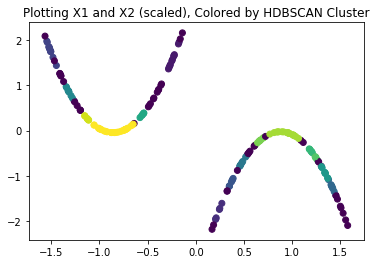

In [37]:
plt.title("Plotting X1 and X2 (scaled), Colored by HDBSCAN Cluster")
plt.scatter(df['x1'], df['x2'], c = h_cluster.labels_);

In [38]:
for i in range(0,600): # picked 200 as there are 200 data points 
    cluster=hdbscan.HDBSCAN(min_cluster_size=0.2,gen_min_span_tree = True) # instantiate 
    cluster.fit(df)
    labels=cluster.labels_
    if len(set(cluster.labels_))==2 and -1 not in set(cluster.labels_):#-1 is the outlier so if there is not outlier use 
        print("Yes! Use min_samples = " + str(i))
        break
    else:
        print("No, not min_samples = " + str(i))

ValueError: Min samples and min cluster size must be integers!

Recall that our learning objectives were to:
- Describe the effect of epsilon and min_points on DBSCAN.
- Implement DBSCAN.
- Identify advantages and disadvantages of DBSCAN.
- Explain and implement HDBSCAN.

<details>
<summary>Describe the effect of epsilon and min_points on DBSCAN.</summary>
```
- epsilon is a hyperparameter of DBSCAN that refers to how far we will "search" from a point to see if other points should be clustered with that point. As epsilon increases, we search farther and expect to include more points in a cluster.
- min_points is a hyperparameter of DBSCAN that refers to how many points are needed for a group to officially be called a "cluster."
- As min_points increases, we expect the number of clusters will decrease and the number of outliers will increase.
```
</details>

<br>

<details>
<summary>Identify advantages of DBSCAN.</summary>
```
- DBSCAN detects clusters that are more dense than outliers.
- DBSCAN can detect concave or irregularly-shaped clusters, whereas most other clustering algorithms cannot (easily) do the same.
- DBSCAN doesn't classify all points, meaning we can use DBSCAN for outlier detection. (The same is not true of hierarchical or k-means clustering.)
- DBSCAN does not need us to pre-identify the number of clusters.
- DBSCAN is generally quite fast.
```
</details>

<br>

<details>
<summary>Identify disadvantages of DBSCAN.</summary>
```
- DBSCAN requires two hyperparameters to tune. This can be difficult, especially in cases where there are not labels to define metrics to "gridsearch" over.
    - The value of epsilon you choose to search is highly dependent on how you scale your variables.
    - To define an appropriate min_samples, you may need a subject-matter expert.
```
</details>

<br>

<details>
<summary>Explain HDBSCAN.</summary>
```
- HDBSCAN requires only one hyperparameter to tune: the minimum number of points you need to define a cluster.
- HDBSCAN calculates, for each point, the epsilon searching distance needed to meet the minimum number of points. The algorithm then constructs a dendrogram using epsilon as the distance between clusters and prunes any clusters that don't meet the minimum points threshold.
```
</details>